In [104]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn. preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


import matplotlib as mpl
import matplotlib.pyplot as plt

In [14]:
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
# y= pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y = pd.Series(breast_cancer.target)

In [17]:
X.shape

(569, 30)

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 0)
print(x_train.shape)
print(x_test.shape)

(398, 30)
(171, 30)


# 基学习器越多，模型拟合效果越好，也越容易过拟合

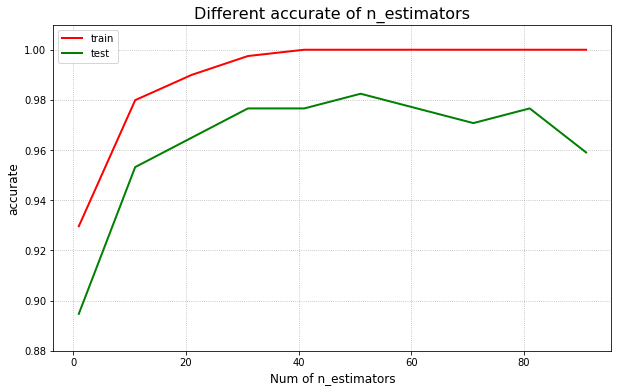

In [99]:
base_estimator = DecisionTreeClassifier(max_depth=1)
n_estimators = np.arange(1,101,10)
accs_train = []
accs_test = []


for n_estimator in n_estimators:
    adaB = AdaBoostClassifier(base_estimator= base_estimator,n_estimators=n_estimator, learning_rate= 0.5, random_state=0)
    adaB.fit(x_train, y_train)

    y_train_pred = adaB.predict(x_train)
    acc_train = metrics.accuracy_score(y_train, y_train_pred)
    accs_train.append(acc_train)
    
    y_test_pred = adaB.predict(x_test)
    acc_test = metrics.accuracy_score(y_test, y_test_pred)
    accs_test.append(acc_test)
    
#画图
plt.figure(figsize=(10,6))
plt.plot(n_estimators, accs_train, 'r-',lw=2, label='train')
plt.plot(n_estimators, accs_test, 'g-',lw=2, label='test')
plt.ylim(0.88,1.01)
plt.xlabel('Num of n_estimators',fontsize = 12)
plt.ylabel('accurate',fontsize =12)
plt.grid(b = True,ls= ':')
plt.title('Different accurate of n_estimators',fontsize = 16)
plt.legend(loc = 'best')
plt.show()

# 同等效果，learning_rates越小，需要基学习器越多

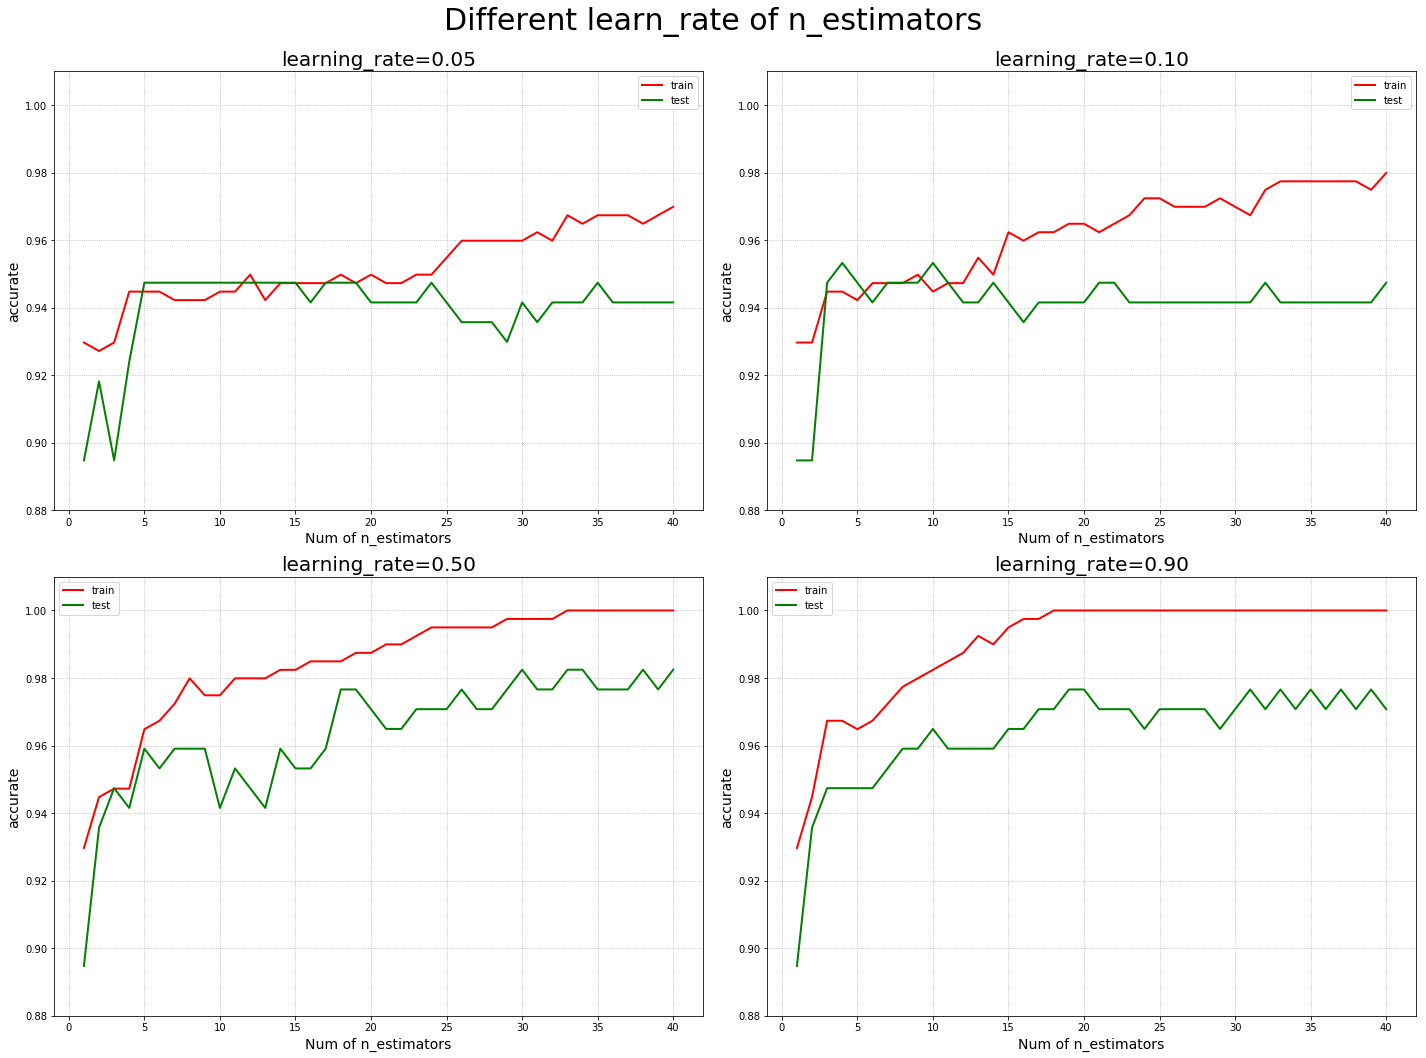

In [85]:
base_estimator = DecisionTreeClassifier(max_depth=1)
learning_rates = [0.05, 0.1, 0.5, 0.9]
n_estimators = np.arange(1,41,1)


plt.figure(figsize=(20,15), facecolor='w')
for i, learning_rate in enumerate(learning_rates):
    accs_train = []
    accs_test = []
    for n_estimator in n_estimators:
        adaB = AdaBoostClassifier(base_estimator= base_estimator,n_estimators=n_estimator, learning_rate= learning_rate, random_state=0)
        adaB.fit(x_train, y_train)

        y_train_pred = adaB.predict(x_train)
        acc_train = metrics.accuracy_score(y_train, y_train_pred)
        accs_train.append(acc_train)

        y_test_pred = adaB.predict(x_test)
        acc_test = metrics.accuracy_score(y_test, y_test_pred)
        accs_test.append(acc_test)
    
    plt.subplot(2, 2, i+1)
    plt.plot(n_estimators, accs_train, 'r-',lw=2, label='train')
    plt.plot(n_estimators, accs_test, 'g-',lw=2, label='test')
    plt.ylim(0.88,1.01)
    plt.xlabel('Num of n_estimators',fontsize = 14)
    plt.ylabel('accurate',fontsize =14)
    plt.grid(b = True,ls= ':')
    plt.title('learning_rate=%.2f'%learning_rate, fontsize = 20)
    plt.legend(loc = 'best')

plt.suptitle('Different learn_rate of n_estimators', fontsize=30)
plt.tight_layout(1.4)
plt.subplots_adjust(top=0.92)
plt.show()

# 深度为5决策树的拟合效果要好于深度为1的决策树;深度为1的决策树的提升效果明显，深度为5的决策树提升不明显；

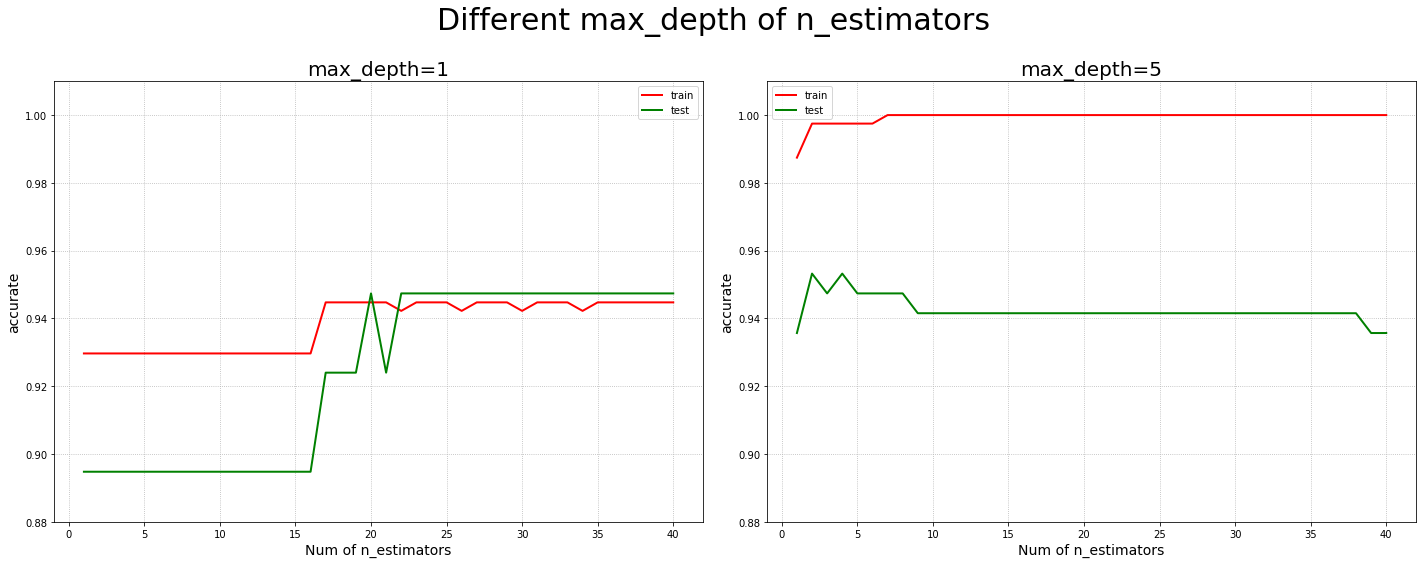

In [86]:
max_depths = [1, 5]
n_estimators = np.arange(1,41,1)


plt.figure(figsize=(20,8), facecolor='w')
for i, max_depth in enumerate(max_depths):
    accs_train = []
    accs_test = []
    for n_estimator in n_estimators:
        adaB = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=max_depth) ,
                                  n_estimators=n_estimator, learning_rate= 0.01, random_state=0)
        adaB.fit(x_train, y_train)

        y_train_pred = adaB.predict(x_train)
        acc_train = metrics.accuracy_score(y_train, y_train_pred)
        accs_train.append(acc_train)

        y_test_pred = adaB.predict(x_test)
        acc_test = metrics.accuracy_score(y_test, y_test_pred)
        accs_test.append(acc_test)
    
    plt.subplot(1, 2, i+1)
    plt.plot(n_estimators, accs_train, 'r-',lw=2, label='train')
    plt.plot(n_estimators, accs_test, 'g-',lw=2, label='test')
    plt.ylim(0.88,1.01)
    plt.xlabel('Num of n_estimators',fontsize = 14)
    plt.ylabel('accurate',fontsize =14)
    plt.grid(b = True,ls= ':')
    plt.title('max_depth=%s'%max_depth, fontsize = 20)
    plt.legend(loc = 'best')

plt.suptitle('Different max_depth of n_estimators', fontsize=30)
plt.tight_layout(1.4)
plt.subplots_adjust(top=0.85)
plt.show()

# SAMME.R和SAMME效果差别不大，SAMME.R更快的提升速度

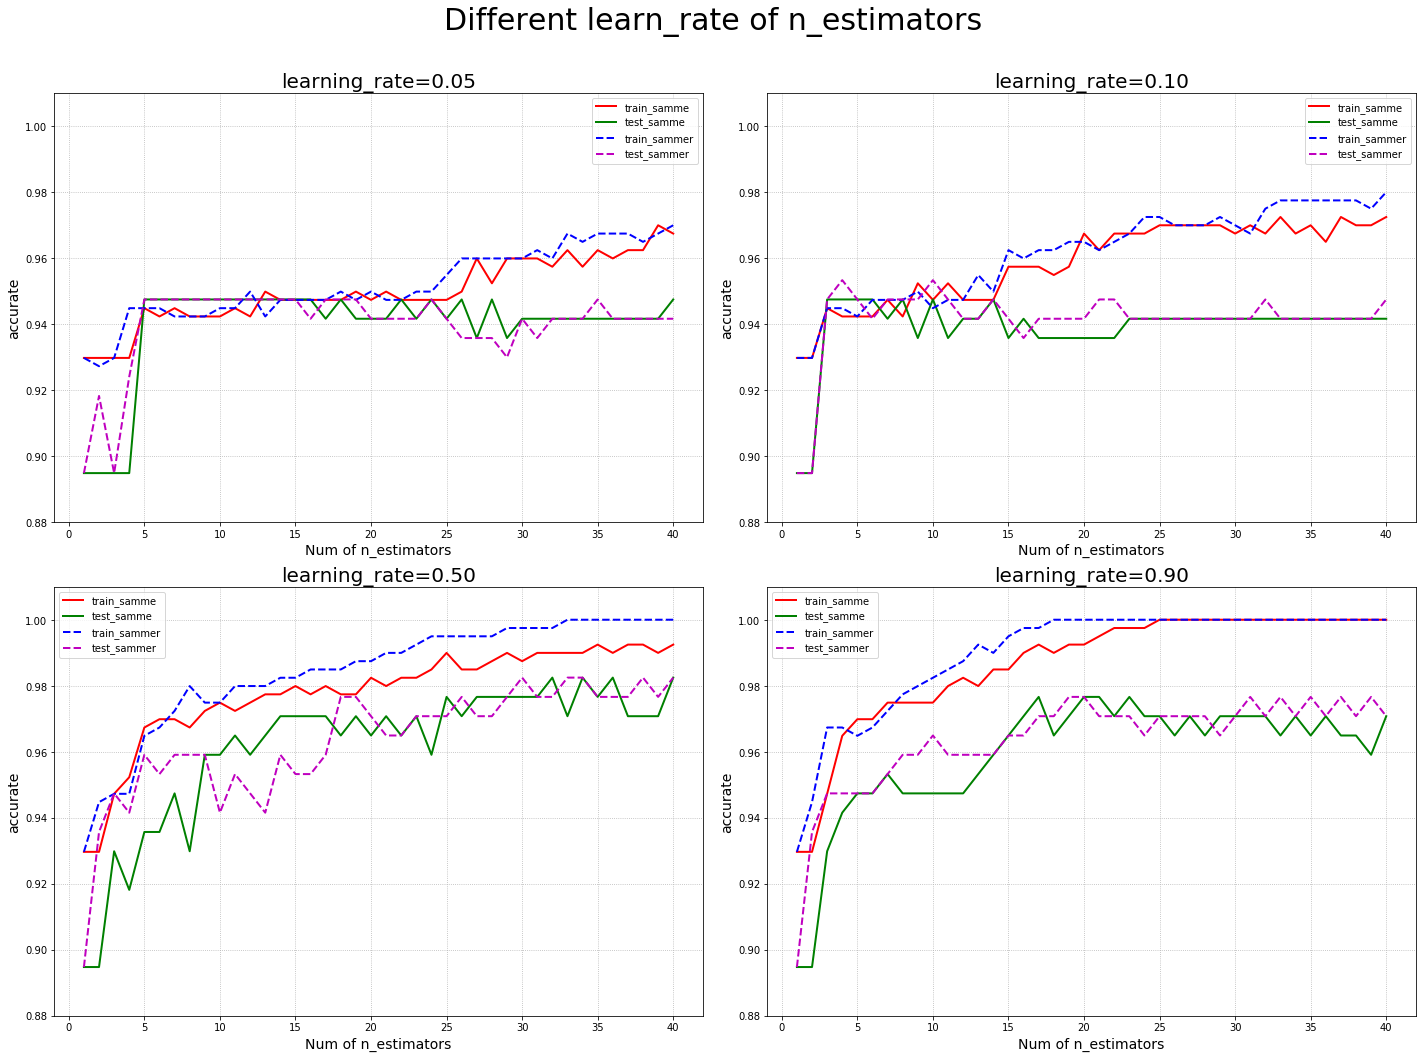

In [98]:
base_estimator = DecisionTreeClassifier(max_depth=1)
learning_rates = [0.05, 0.1, 0.5, 0.9]
n_estimators = np.arange(1,41,1)


plt.figure(figsize=(20,15), facecolor='w')
for i, learning_rate in enumerate(learning_rates):
    accs_train_samme = []
    accs_test_samme = []
    accs_train_sammer = []
    accs_test_sammer = []
    for n_estimator in n_estimators:
        adaB_sammer = AdaBoostClassifier(base_estimator= base_estimator,n_estimators=n_estimator, 
                                        algorithm='SAMME.R',learning_rate= learning_rate, random_state=0)
        adaB_sammer.fit(x_train, y_train)

        y_train_pred = adaB_sammer.predict(x_train)
        acc_train = metrics.accuracy_score(y_train, y_train_pred)
        accs_train_sammer.append(acc_train)

        y_test_pred = adaB_sammer.predict(x_test)
        acc_test = metrics.accuracy_score(y_test, y_test_pred)
        accs_test_sammer.append(acc_test)
        
        adaB_samme = AdaBoostClassifier(base_estimator= base_estimator,n_estimators=n_estimator, 
                                        algorithm='SAMME', learning_rate= learning_rate, random_state=0)
        adaB_samme.fit(x_train, y_train)

        y_train_pred = adaB_samme.predict(x_train)
        acc_train = metrics.accuracy_score(y_train, y_train_pred)
        accs_train_samme.append(acc_train)

        y_test_pred = adaB_samme.predict(x_test)
        acc_test = metrics.accuracy_score(y_test, y_test_pred)
        accs_test_samme.append(acc_test)
        
    
    plt.subplot(2, 2, i+1)
    plt.plot(n_estimators, accs_train_samme, 'r-',lw=2, label='train_samme')
    plt.plot(n_estimators, accs_test_samme, 'g-',lw=2, label='test_samme')
    plt.plot(n_estimators, accs_train_sammer, 'b--',lw=2, label='train_sammer')
    plt.plot(n_estimators, accs_test_sammer, 'm--',lw=2, label='test_sammer')
    plt.ylim(0.88,1.01)
    plt.xlabel('Num of n_estimators',fontsize = 14)
    plt.ylabel('accurate',fontsize =14)
    plt.grid(b = True,ls= ':')
    plt.title('learning_rate=%.2f'%learning_rate, fontsize = 20)
    plt.legend(loc = 'best')

plt.suptitle('Different learn_rate of n_estimators', fontsize=30)
plt.tight_layout(1.4)
plt.subplots_adjust(top=0.90)
plt.show()

# 调参

In [120]:
param_grid = {'learning_rate':[0.05, 0.1, 0.5, 0.9], 'n_estimators' :np.arange(1,41,5)}
ada_grid = GridSearchCV(estimator=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1)),
                       param_grid=param_grid, cv=3, scoring = 'roc_auc')
ada_grid.fit(x_train, y_train)
ada_grid.best_params_

{'learning_rate': 0.9, 'n_estimators': 26}

In [125]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),learning_rate=0.9,n_estimators=26, random_state=0)
ada.fit(x_train, y_train)

y_train_pred = ada.predict(x_train)
acc_train = metrics.accuracy_score(y_train, y_train_pred)
print('acc_train:',acc_train)

y_test_pred = ada.predict(x_test)
acc_test = metrics.accuracy_score(y_test, y_test_pred)
print('acc_test:',acc_test)

acc_train: 1.0
acc_test: 0.9707602339181286


In [126]:
#查看特征的重要性
important_features = pd.DataFrame({'feature':X.columns,'importance':ada.feature_importances_})
important_features.sort_values(by = 'importance',ascending = False,inplace =True)
important_features['cum_importance'] = np.cumsum(important_features['importance'])
important_features

,feature,importance,cum_importance
22,worst perimeter,0.115385,0.115385
21,worst texture,0.115385,0.230769
7,mean concave points,0.115385,0.346154
15,compactness error,0.076923,0.423077
23,worst area,0.076923,0.500000
19,fractal dimension error,0.076923,0.576923
13,area error,0.076923,0.653846
11,texture error,0.038462,0.692308
27,worst concave points,0.038462,0.730769
26,worst concavity,0.038462,0.769231
